In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The idea:
1. I would like to measure how well are my models predicting and can I really use these models to trade.
2. The idea here would be to compare the predicted price from tomorrow to the actual price.
3. Then go long(+1) if the model predicts higher or go short(-1) if the model predicts lower.
4. Then calculate the daily return which would be % change * my position.
5. Then accumulate the results and compute the sharpe ratio.

#### 🔹 Step 1 — Real Daily Return
$$
r_t = \dfrac{P_{t+1} - P_t}{P_t}
$$
#### 🔹 Step 2 — Trading Signal
$$
signal_t = sign(pred_{t+1} − actual_t)
$$
#### 🔹 Step 3 — Strategy Return
$$
strategy return_t = signal_t * r_t
$$
#### 🔹 Step 4 — Cumulative Growth
$$
Cumulative = Π_t (1 + strategy_return_t) − 1
$$
#### 🔹 Step 5 — Sharpe Ratio
$$
Sharpe = mean(strategy return_t) / std(strategy return_t) * sqrt(252)
$$

In [16]:
actual = np.array([100, 102, 101, 103])
pred   = np.array([101, 103, 102, 104])

# How do I compute real daily return:
returns = (actual[1:] - actual[:-1]) / actual[:-1]
print(returns)

# How do I decide when to go long an short:
signal = np.sign(pred[1:] - actual[:-1])
print(signal)

# How do I compute my strategy return each day:
strategy_return = signal * returns
print(strategy_return)

# How do I get cumulative growth:
cumulative_growth = np.cumprod(1 + strategy_return) - 1
print(cumulative_growth)

# How do I get the Sharpe Ratio:
sharpe_ratio = np.mean(strategy_return) / np.mean(strategy_return) * np.sqrt(252)
print(f"{sharpe_ratio: .3f}")

[ 0.02       -0.00980392  0.01980198]
[1 0 1]
[ 0.02       -0.          0.01980198]
[0.02       0.02       0.04019802]
 15.875


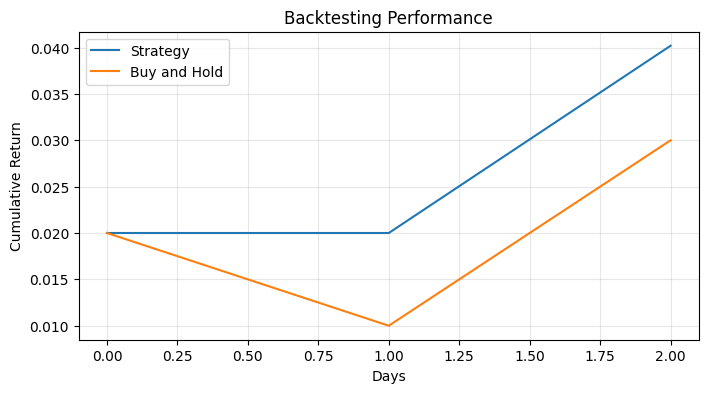

In [13]:
plt.figure(figsize=(8,4))
plt.plot(cumulative_growth, label="Strategy")
plt.plot(np.cumprod(1 + returns) - 1, label="Buy and Hold")
plt.legend()
plt.title("Backtesting Performance")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.show()